# Qunatum Challange 2021 ex3(Error correction)
## Toffoli Gate (ex1)
白石さんの解説
https://qiita.com/Ayumu_walker/items/bf4d2f98d1860a3409c3

https://ibm-g9.slack.com/archives/C5MAZGJV7/p1622555750133000?thread_ts=1622538252.130500&cid=C5MAZGJV7

https://ibm-g9.slack.com/archives/C5MAZGJV7/p1622598968139100
    子振幅推定と数値積分 by 量子熊 | blueqat
    https://blueqat.com/Kuma/a13a5b9b-065d-44d3-972f-5e3b69b2323c

## Shor's Algorithm(ex2)
- [ex2](https://github.com/qiskit-community/ibm-quantum-challenge-2021/blob/main/solutions%20by%20authors/ex2/ex2-solution.ipynb)
### References

- Youtube: [Qiskit Textbook 日本語解説 3.9章](https://youtu.be/25J1jshTp0k) by Quantum Tokyo
- Textbook : [Shor's Algorithm](https://learn.qiskit.org/course/ch-algorithms/shors-algorithm)

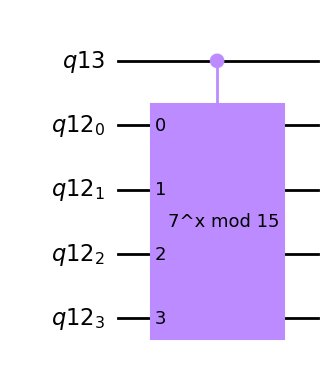

In [19]:
from qiskit import QuantumCircuit, QuantumRegister
c = QuantumRegister(4)
t = QuantumRegister(4)
U = QuantumCircuit(c,t)
# a=7
# N=15
U.x([0,1,2,3])
U.swap(0,1)
U.swap(1,2)
U.swap(2,3)
U.to_gate()
U.name='7^x mod 15'
c_U=U.control()
c_U.draw("mpl")

# control bits


In [ ]:
from qiskit import Aer

## Qiskit implementation
### Summary of Quantum Operations¶
https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html
Goal : To print matrix of the circuit or gates

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit import BasicAer
from math import pi

backend = BasicAer.get_backend('unitary_simulator')
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.u(pi/2,pi/4,pi/8,q)
qc.draw()

┌────────────────┐
q0: ┤ U(π/2,π/4,π/8) ├
    └────────────────┘

In [3]:
job = backend.run(transpile(qc,backend))
qc_state = job.result().get_unitary(qc,decimals=3)
qc_state

array([[ 0.707+0.j   , -0.653-0.271j],
       [ 0.5  +0.5j  ,  0.271+0.653j]])

### plot histogram

[qiskit.visualization.plot_histogram](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_histogram.html)

Goal : To plot the result of the circuit measurements


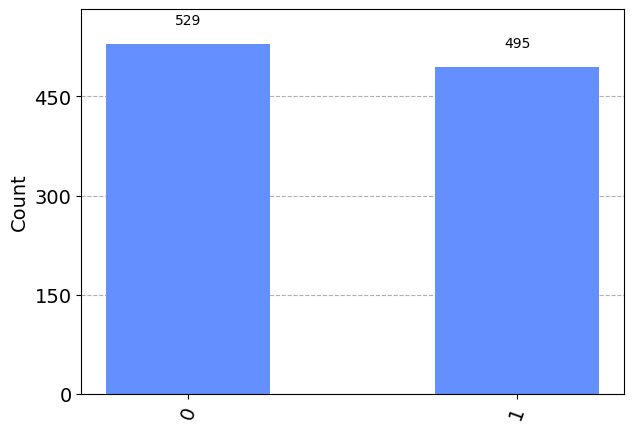

In [5]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
counts = AerSimulator().run(qc).result().get_counts()
plot_histogram(counts)

- Grover's search algorithm
https://learn.qiskit.org/course/introduction/grovers-search-algorithm

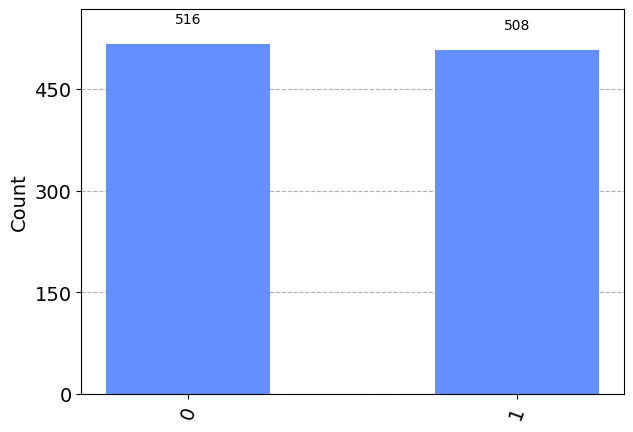

In [6]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Shor's Algorithm -textbook
https://learn.qiskit.org/course/ch-algorithms/shors-algorithm

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

Imports Successful


In [2]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 2.3 MB/s eta 0:00:0000:0100:01
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 2.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [4]:
!pip install pandas

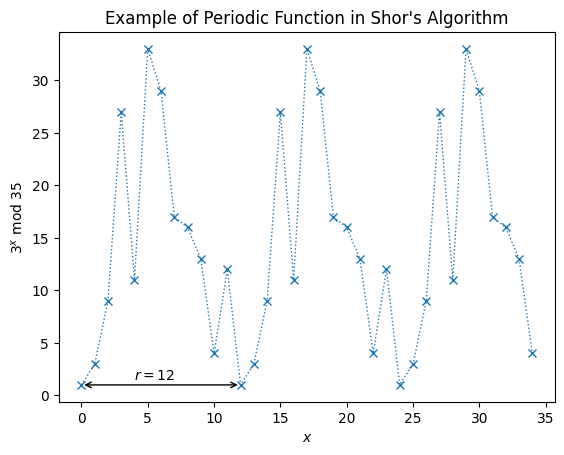

In [5]:
N = 35
a = 3

# Calculate the plotting data
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=f'${a}^x$ mod ${N}$',
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) + 1
    plt.annotate('', xy=(0,1), xytext=(r,1),
                 arrowprops=dict(arrowstyle='<->'))
    plt.annotate(f'$r={r}$', xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

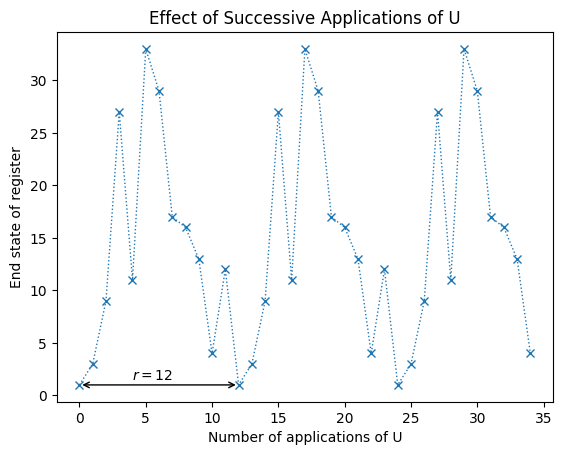

In [6]:
ax.set(xlabel='Number of applications of U',
       ylabel='End state of register',
       title="Effect of Successive Applications of U")
fig

In [7]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

In [8]:
# Specify variables
N_COUNT = 8  # number of counting qubits
a = 7

In [9]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [10]:
# Create QuantumCircuit with N_COUNT counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(N_COUNT + 4, N_COUNT)

# Initialize counting qubits
# in state |+>
for q in range(N_COUNT):
    qc.h(q)

# And auxiliary register in state |1>
qc.x(N_COUNT)

# Do controlled-U operations
for q in range(N_COUNT):
    qc.append(c_amod15(a, 2**q),
             [q] + [i+N_COUNT for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(N_COUNT), range(N_COUNT))

# Measure circuit
qc.measure(range(N_COUNT), range(N_COUNT))
qc.draw(fold=-1)  # -1 means 'do not fold'

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ─────┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

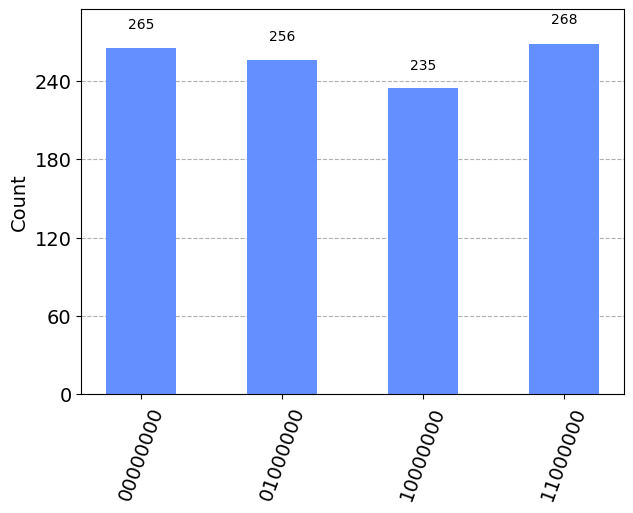

In [14]:
from qiskit import execute
aer_sim = Aer.get_backend('aer_simulator')
# t_qc = transpile(qc, aer_sim)
# counts = aer_sim.run(t_qc).result().get_counts()
counts = execute(qc, backend = aer_sim, shots = 1024).result().get_counts()
plot_histogram(counts)

In [17]:
rows, measured_phases = [],[]
print(counts)
for output in counts:
    print(output)
    decimal = int(output, 2)
    print(decimal)
    phase = decimal/(2**N_COUNT)
    measured_phases.append(phase)
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{decimal}/{2**N_COUNT} = {phase:.2f}"])

headers = ["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)


{'00000000': 265, '10000000': 235, '01000000': 256, '11000000': 268}
00000000
0
10000000
128
01000000
64
11000000
192
            Register Output           Phase
0  00000000(bin) =   0(dec)    0/256 = 0.00
1  10000000(bin) = 128(dec)  128/256 = 0.50
2  01000000(bin) =  64(dec)   64/256 = 0.25
3  11000000(bin) = 192(dec)  192/256 = 0.75


## challenge ex2 2a

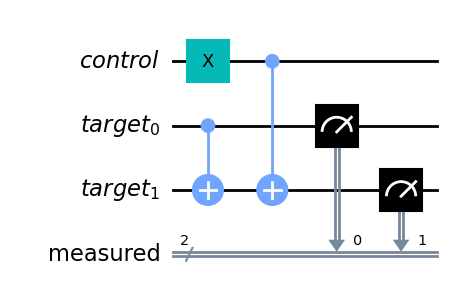

In [23]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
m = ClassicalRegister(2, 'measured')
cu = QuantumCircuit(c, t, m, name="Controlled 13^x mod 35")

# 이 선들 사이에 코드를 적으십시오 - 시작
cu.x(c[0])
cu.cx(t[0],t[1])
cu.cx(c[0],t[1])

cu.measure(t[0:2], m[0:2])
# 이 선들 사이에 코드를 적으십시오 - 끝

cu.draw('mpl')


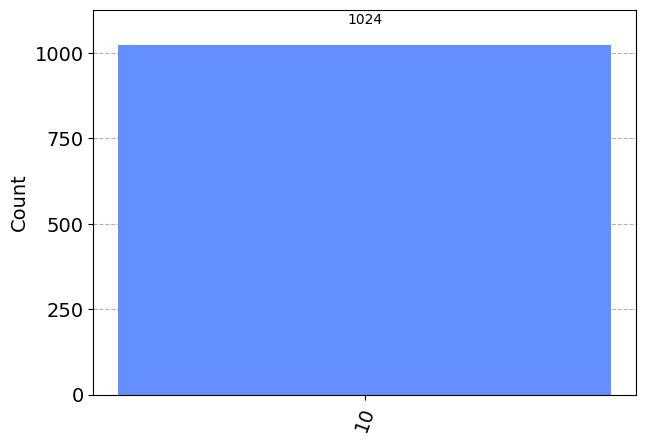

In [24]:
backend = Aer.get_backend('qasm_simulator')
job = execute(cu, backend = backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)